<a href="https://colab.research.google.com/github/mansibhat/visualization-using-Python/blob/main/LineandBarplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import pandas as pd
from vega_datasets import data

In [3]:
stock_data = data.stocks()
stock_data


,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45
...,...,...,...
555,AAPL,2009-11-01,199.91
556,AAPL,2009-12-01,210.73
557,AAPL,2010-01-01,192.06
558,AAPL,2010-02-01,204.62


In [4]:
stock_data.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


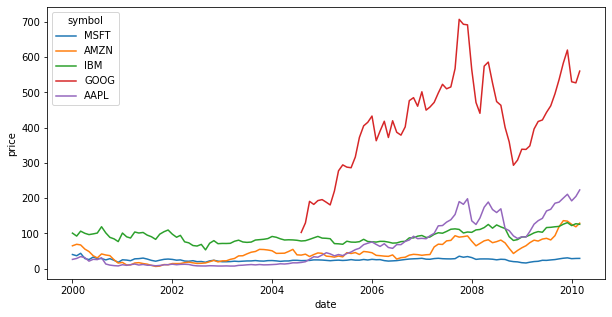

In [23]:
plt.figure(figsize=(10, 5))
sns.lineplot('date','price',hue='symbol' ,data=stock_data)

In [13]:
#How to pivot a table on Python
stock_data_pivoted= stock_data.pivot_table(index='date',columns='symbol',values='price')

Moving Averages

In [56]:
sp_data=data.sp500()

In [57]:
sp_data

,date,price
0,2000-01-01,1394.46
1,2000-02-01,1366.42
2,2000-03-01,1498.58
3,2000-04-01,1452.43
4,2000-05-01,1420.60
...,...,...
118,2009-11-01,1095.63
119,2009-12-01,1115.10
120,2010-01-01,1073.87
121,2010-02-01,1104.49


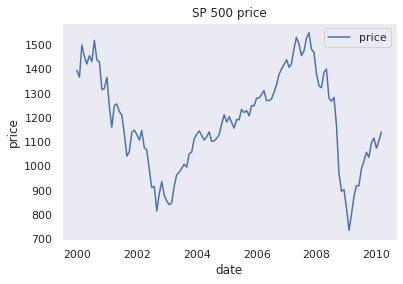

In [58]:
#sns.lineplot('date','price',data=sp_data)
sns.lineplot(x='date', y='price', data=sp_data)
sns.set_theme(style= 'dark') #default styles are darkgrid, whitegrid, dark, white, and ticks
plt.title('SP 500 price')
plt.legend(labels=['price'])

In [60]:
#Moving Averages
sp_data['ma_5']= sp_data.price.rolling(5).mean()
sp_data['ma_15']=sp_data.price.rolling(15).mean()


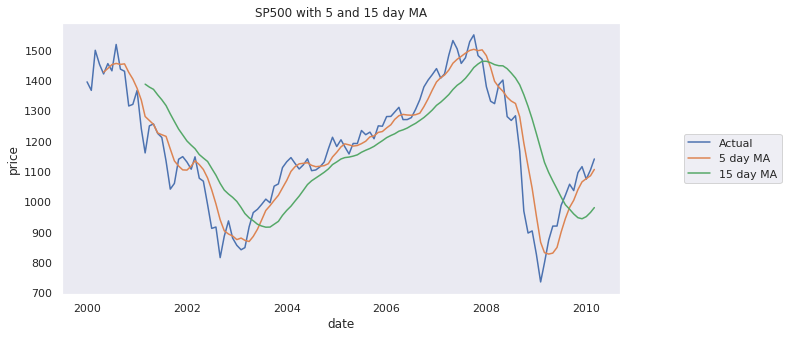

In [81]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='date',y='price',data=sp_data)
sns.lineplot(x='date', y='ma_5', data=sp_data)
sns.lineplot(x='date', y='ma_15', data=sp_data)
plt.title('SP500 with 5 and 15 day MA')
plt.legend(labels=['Actual','5 day MA','15 day MA'],loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)
plt.show()



**Percent Change**

In [7]:
stock_data_pivoted.head()


symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2000-01-01,25.94,64.56,NaN,100.52,39.81
2000-02-01,28.66,68.87,NaN,92.11,36.35
2000-03-01,33.95,67.00,NaN,106.11,43.22
2000-04-01,31.01,55.19,NaN,99.95,28.37
2000-05-01,21.00,48.31,NaN,96.31,25.45


In [14]:

tickers = stock_data_pivoted.columns
tickers

Index(['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT'], dtype='object', name='symbol')

In [15]:
stock_data_pivoted.reset_index(inplace=True)

In [17]:
stock_data_pivoted.head()

symbol,date,AAPL,AMZN,GOOG,IBM,MSFT
0,2000-01-01,25.94,64.56,NaN,100.52,39.81
1,2000-02-01,28.66,68.87,NaN,92.11,36.35
2,2000-03-01,33.95,67.00,NaN,106.11,43.22
3,2000-04-01,31.01,55.19,NaN,99.95,28.37
4,2000-05-01,21.00,48.31,NaN,96.31,25.45


In [18]:
stock_data_pivoted.index = stock_data_pivoted.date
stock_data_pivoted.pop('date')

date
2000-01-01   2000-01-01
2000-02-01   2000-02-01
2000-03-01   2000-03-01
2000-04-01   2000-04-01
2000-05-01   2000-05-01
                ...    
2009-11-01   2009-11-01
2009-12-01   2009-12-01
2010-01-01   2010-01-01
2010-02-01   2010-02-01
2010-03-01   2010-03-01
Name: date, Length: 123, dtype: datetime64[ns]

In [19]:
stock_daily_return = stock_data_pivoted.pct_change()

In [21]:
stock_daily_return.tail()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2009-11-01,0.060531,0.143927,0.087443,0.052284,0.065138
2009-12-01,0.054124,-0.010227,0.063431,0.036012,0.036556
2010-01-01,-0.088597,-0.067722,-0.145230,-0.064994,-0.075478
2010-02-01,0.065396,-0.055897,-0.005925,0.043578,0.022103
2010-03-01,0.089923,0.088007,0.063383,-0.012661,0.004534


In [ ]:
#df.cumsum() -cumulative


In [22]:
#Correlations and heatmaps
stock_cor = stock_data_pivoted.corr()

In [24]:
stock_cor

symbol,AAPL,AMZN,GOOG,IBM,MSFT
symbol,,,,,
AAPL,1.000000,0.872996,0.849000,0.710545,0.357936
AMZN,0.872996,1.000000,0.674580,0.701340,0.392105
GOOG,0.849000,0.674580,1.000000,0.665615,0.710338
IBM,0.710545,0.701340,0.665615,1.000000,0.560398
MSFT,0.357936,0.392105,0.710338,0.560398,1.000000


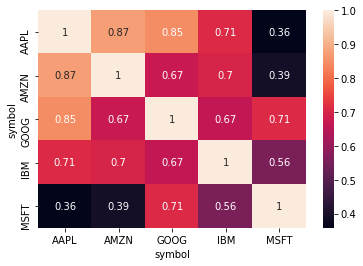

In [26]:
sns.heatmap(stock_cor,annot=True)

**Barplot**

In [28]:
tips_data= sns.load_dataset('tips')

In [29]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
tips_data.shape

(244, 7)

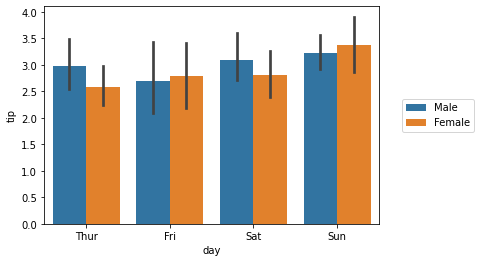

In [42]:
sns.barplot(x = 'day', y ='tip', hue= 'sex',  data=tips_data)
plt.legend(loc='center right',bbox_to_anchor=(1.3, 0.5), ncol=1)

No handles with labels found to put in legend.


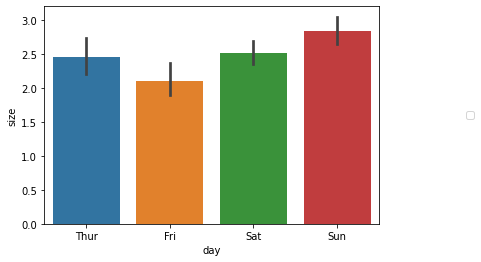

In [52]:
sns.barplot(x='day', y='size', data= tips_data)
plt.legend(loc='center right',bbox_to_anchor=(1.3, 0.5), ncol=1)

Text(0.5, 1.0, 'lalal')

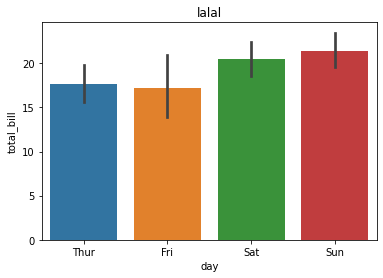

In [67]:

sns.barplot(x='day', y='total_bill', data=tips_data).set_title('lalal')


**Distribution**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of total bill amount')

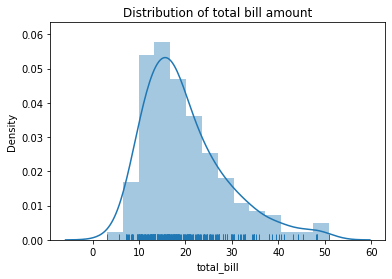

In [69]:
sns.distplot(tips_data.total_bill, kde=True, rug=True).set_title('Distribution of total bill amount')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution by Gender')

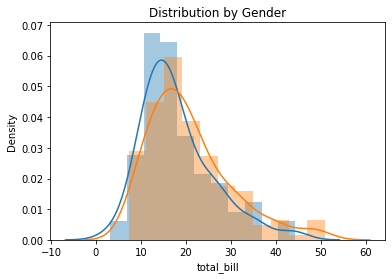

In [83]:
sns.distplot(tips_data[tips_data.sex=='Female'].total_bill, label='Female')
sns.distplot(tips_data[tips_data.sex=='Male'].total_bill, label='Male').set_title('Distribution by Gender')